In [19]:
%tensorflow_version 1.x

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [22]:
num_input = 28 * 28
num_hidden = 256

learning_rate = 0.01
training_epoch = 10
batch_size = 100

num_output_sample = 10

In [23]:
x_true = tf.placeholder(tf.float32, [None, num_input])

In [24]:
y_true = x_true

In [25]:
weight_encoder = tf.Variable(tf.truncated_normal([num_input, num_hidden]))
bias_encoder = tf.Variable(tf.truncated_normal([num_hidden]))

In [26]:
weight_decoder = tf.Variable(tf.truncated_normal([num_hidden, num_input]))
bias_decoder = tf.Variable(tf.truncated_normal([num_input]))

In [27]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(x_true, weight_encoder), bias_encoder))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, weight_decoder), bias_decoder))

In [28]:
cost = tf.reduce_mean(tf.square(y_true- decoder))
optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

In [29]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [32]:
total_batch = int(mnist.train.num_examples /batch_size)
total_batch

550

In [33]:
for epoch in range(training_epoch):
    total_cost =0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([optimizer,cost],{x_true:batch_xs})
        total_cost += cost_value
    print("Epoch : {0}, Cost :{1}".format(epoch +1, total_cost/ total_batch))
print("최적화를 완료했습니다.")

Epoch : 1, Cost :0.05781427510082722
Epoch : 2, Cost :0.035164290622554044
Epoch : 3, Cost :0.03133887676014142
Epoch : 4, Cost :0.029215677604079247
Epoch : 5, Cost :0.02748758543960073
Epoch : 6, Cost :0.0263259455697103
Epoch : 7, Cost :0.025479981194842946
Epoch : 8, Cost :0.025069548027081924
Epoch : 9, Cost :0.024852418425408276
Epoch : 10, Cost :0.0246970724043521
최적화를 완료했습니다.


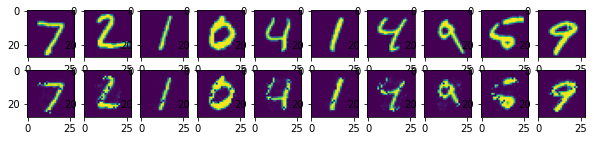

In [34]:
samples = sess.run(decoder, {x_true:mnist.test.images[:num_output_sample]})
fig, ax = plt.subplots(2, num_output_sample, figsize = (num_output_sample,2))
for i in range(num_output_sample):
    ax[0][i].set_axis_off
    ax[1][i].set_axis_off
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    ax[1][i].imshow(np.reshape(samples[i],(28,28)))
plt.show()